<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Machine Learning: Laboratorio 02
*28 de Septiembre de 2024*

**Nombre Estudiante(s)**: `Gabriel Álvarez - Cristián Pizarro - César Soto - Rosario Valderrama Labarca`

## Introducción

El análisis de colores ha sido una estrategia sumamente relevante tanto en áreas relacionadas a la estética (ej. Publicidad y Marketing) así como también en aquellas relacionadas al procesamiento de datos para su posterior análisis (ej. Visión artificial). 

Si bien hoy en día existe una amplia variedad de métodos disponibles con el fin de estudiar o procesar imágenes, cada uno de ellos tiene sus propias capacidades y limitaciones. 

En el presente trabajo, estudiaremos y compararemos los alcaces de algunas técnicas de clustering mediante un ejercicio práctico. 


## Objetivo

El objetivo es determinar la paleta de colores predominante de una imagen y reproducirla lo más fielmente posible con la misma. 


## Metodología

Para el desarrollo de este proyecto, se realizará un análisis comparado mediante los algoritmos KMeans, Clustering Jerárquico y Gaussian Mixtures, evaluando y ajustando los parámetros para cada uno de ellos. 

Esta comparación implica un análisis de la paleta de colores resultante por cada método, así como también una evaluación de la consistencia visual de la imagen resultante. 

## Librerías a utilizar: 

- **Numpy**: Se utilizará para la manipulación de datos.


- **Matplotlib**: Librería que utilizaremos para la visualización de datos. 


- **Image**: Se utilizará para cargar y manipular imágenes. 


- **Kmeans**: Algoritmo para generar clusterización mediante Kmeans, de la librería de sklearn. 


- **Cdist**: Algoritmo que permite calcular la distancia entre dos puntos. Se utilizará para generar el cálculo de la distorción para diferentes modelos Kmeans. 


- **AggromerativeClustering**: Algoritmo para generar clusterización mediante Clustering Jerárquico, de la librería de sklearn. 


- **Linkage**: Algoritmo para aplicar Clustering Jerárquico, de la librería de sklearn. El objetivo de este algoritmo no es generar los clusters, sino que obtener la "matriz-Z" que permitirá generar el dendograma. 


- **Dendogram**: Se utilizará para visualizar el dendograma. 


- **Fcluster**: Se utilizará para obtener los clusters "cortados" (principales) a partir de la distancia máxima establecida. 


- **GaussianMixture**: Algoritmo para generar clusterización mediante Mezcla de Gaussianas, de la librería de sklearn. 

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install scipy
# !pip install scikit-learn

In [1]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist

## Desarrollo: 


**Procesamiento**:  La imagen que se utilizará será la de un parque donde se encuentran flores de diferentes colores. 
Para trabajar con esta imagen, debe ser procesada y convertida en una matriz 2D de píxeles, donde cada uno de éstos se representa por sus valores RGB.

In [5]:
# Para imprimir la paleta de colores en Código RGBa
def print_paleta(paleta, etiqueta):
    print(f"\nPaleta de colores usando {etiqueta}:")
    for i, color in enumerate(paleta):
        print(f"Color {i+1}: {color}")
        
def img_paleta(colores):
    plt.figure(figsize=(12, 2))
    plt.title('Colores promedio')
    plt.imshow([colores])  
    plt.axis('off')
    plt.show()

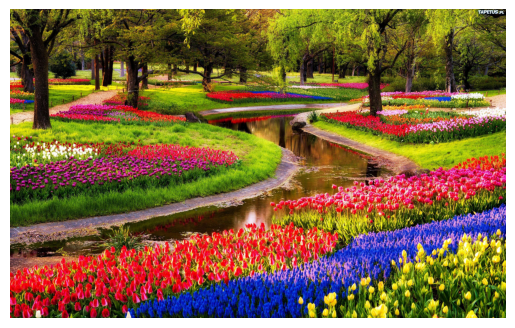

In [10]:
# Se carga la imagen
image_path = '../data/flores3.png'  
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off') 
plt.show()

In [5]:
# Se convierte la imagen a una matriz de píxeles
image_np = np.array(image)
print(f"Forma original de la imagen: {image_np.shape}")

pixels = image_np.reshape(-1, 4)
print(f"Forma de la imagen convertida en píxeles: {pixels.shape}")

Forma original de la imagen: (920, 1479, 4)
Forma de la imagen convertida en píxeles: (1360680, 4)


## I. Clusterización con Kmeans: 

El primer método de clusterización aplicado se realizó a través del algoritmo *KMeans*. Para su correcto ajuste, se definió desarrollar 10 modelos que contengan desde 1 a 10 clusters, con el fin de comparar la inercia y la distorsión de cada uno de ellos.

In [6]:
# Se ejecuta kmeans calculando inertia y distortion para distintos k (clusters). 
inertia = []
distortion = []
cluster_range = range(1, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    inertia.append(kmeans.inertia_)
    distortion.append(sum(np.min(cdist(pixels, kmeans.cluster_centers_,
                                    'euclidean'), axis=1)) / pixels.shape[0])

Una vez obtenidos los resultados de inercia y distorsión en los 10 modelos, se procede a graficarlos para determinar cuál es la cantidad óptima de clusters a utilizar.

La forma de determinar la cantidad óptima de clusters es a través de la técnica del "codo", la cual consiste en identificar el punto en el que la inercia disminuye de forma más significativa y se estabiliza.

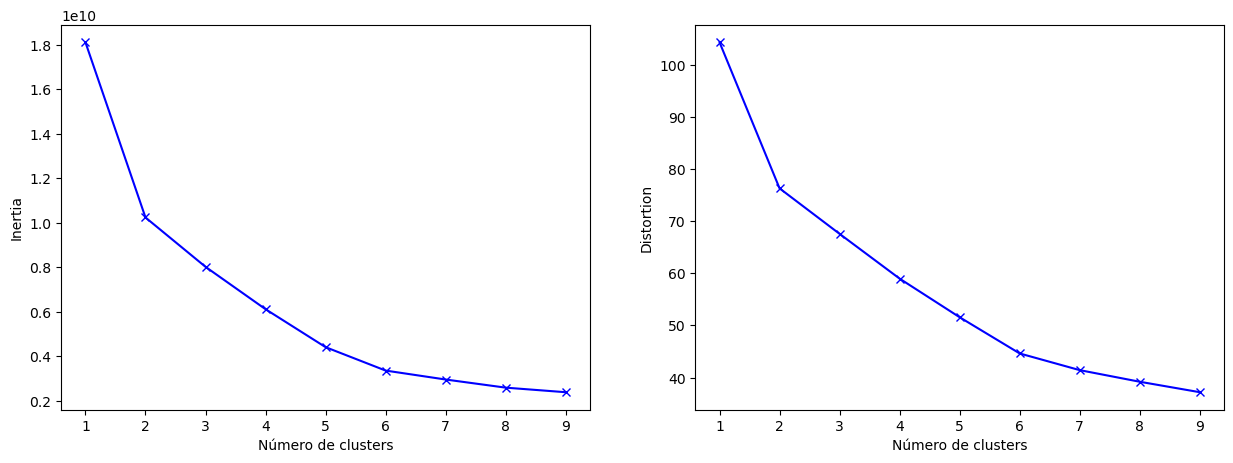

In [7]:
## Graficamos los resultados
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(cluster_range, inertia, 'bx-')
ax[0].set_xlabel('Número de clusters')
ax[0].set_ylabel('Inertia')

ax[1].plot(cluster_range, distortion, 'bx-')
ax[1].set_xlabel('Número de clusters')
ax[1].set_ylabel('Distortion')

plt.show()

A través de un *scree plot* somos capaces de verificar que un valor de 5 clusters optimiza correctamente su agrupación (menos distancia o dispersión entre los puntos y su centroide). A partir de este punto, la variación de inercia y de distorsión comienza a ser menos significativa.

Por estos motivos, se decidió aplicar K-means con 5 clusters, y utilizar los colores resultantes para reconstruir la imagen a continuación: 

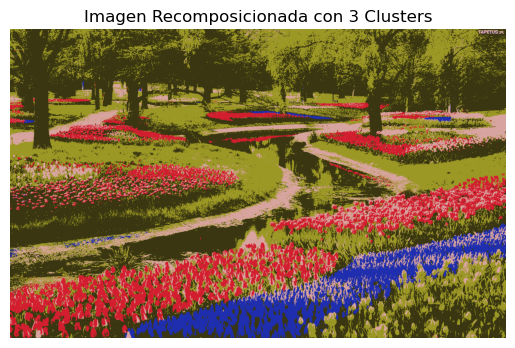

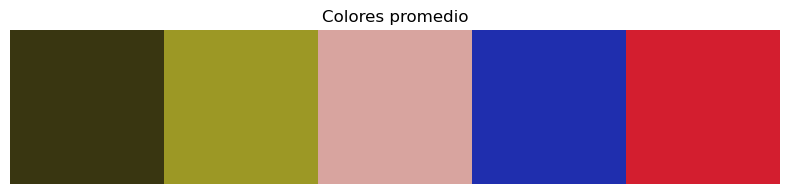


Paleta de colores usando KMeans:
Color 1: [ 57  54  17 255]
Color 2: [156 152  37 255]
Color 3: [216 164 159 255]
Color 4: [ 31  46 174 255]
Color 5: [211  30  47 255]


In [8]:
# Se aplica KMeans con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pixels)

# Se obtienen los centroides, o colores, de los clusters
centroids = np.array(kmeans.cluster_centers_, dtype='uint8')

# Se asigna cada píxel a su color más cercano, luego recomponemos la imagen
labels = kmeans.labels_
reconstructed_image = centroids[labels].reshape(image_np.shape)

plt.imshow(reconstructed_image)
plt.axis('off')  # No mostrar los ejes
plt.title('Imagen Recomposicionada con 5 Clusters')
plt.show()
img_paleta(centroids)
print_paleta(centroids, "KMeans")

Sin embargo, aún es de interés conocer  más sobre la predominancia de los colores obtenidos, así como también comparar los colores resultantes a medida que incorporamos clusters en el modelo. Esto permitirá explicar de mejor manera lo ocurre cuando seleccionamos un modelo con una alta dispersión intra-cluster. 

Bajo esta razón, se procede a generar 3 modelos adicionales con 3, 4 y 5 clusters respectivamente. A continuación, se visualizan las imágenes resultantes a partir de los colores predominantes obtenidos por cada uno de ellos: 

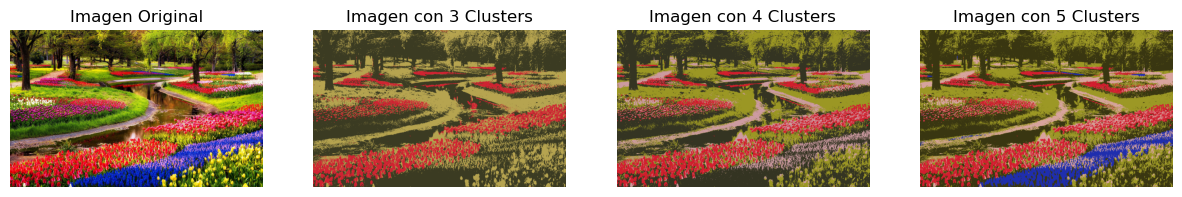


Paleta de colores usando Imagen con 3 Clusters:
Color 1: [208  35  50 255]
Color 2: [ 59  59  34 255]
Color 3: [182 164  80 255]


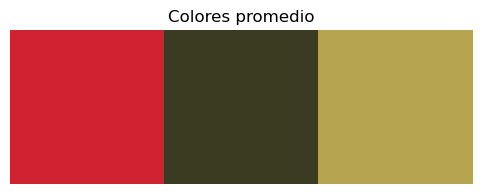


Paleta de colores usando Imagen con 4 Clusters:
Color 1: [155 151  36 255]
Color 2: [ 52  52  34 255]
Color 3: [210  30  45 255]
Color 4: [205 155 162 255]


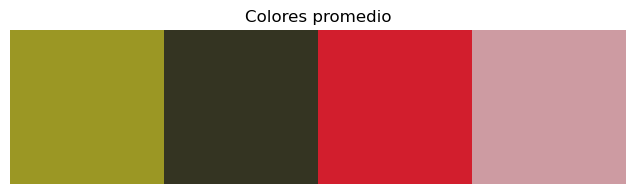


Paleta de colores usando Imagen con 5 Clusters:
Color 1: [ 57  54  17 255]
Color 2: [156 152  37 255]
Color 3: [216 164 159 255]
Color 4: [ 31  46 174 255]
Color 5: [211  30  47 255]


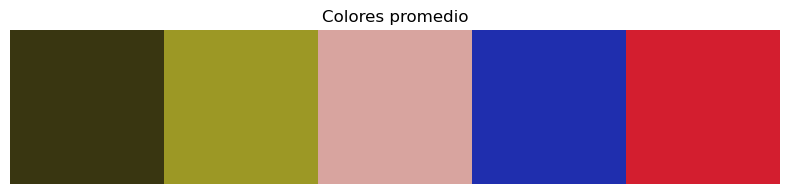

In [9]:
# Función para aplicar KMeans y recomponer la imagen con un número dado de clusters
def apply_kmeans_and_reconstruct(n_clusters, pixels, image_shape):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pixels)
    centroids = np.array(kmeans.cluster_centers_, dtype='uint8')
    labels = kmeans.labels_
    reconstructed_image = centroids[labels].reshape(image_shape)
    return reconstructed_image, centroids

# Se aplica KMeans para 3, 5 y 6 clusters
image_3_clusters,centroids1 = apply_kmeans_and_reconstruct(3, pixels, image_np.shape)
image_5_clusters,centroids2 = apply_kmeans_and_reconstruct(4, pixels, image_np.shape)
image_6_clusters,centroids3 = apply_kmeans_and_reconstruct(5, pixels, image_np.shape)

# Se muestran las imágenes recompuestas para comparar visualmente
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Imagen Original')
plt.axis('off')  

plt.subplot(1, 4, 2)
plt.imshow(image_3_clusters)
plt.axis('off')
plt.title('Imagen con 3 Clusters')

plt.subplot(1, 4, 3)
plt.imshow(image_5_clusters)
plt.axis('off')
plt.title('Imagen con 4 Clusters')

plt.subplot(1, 4, 4)
plt.imshow(image_6_clusters)
plt.axis('off')
plt.title('Imagen con 5 Clusters')


plt.show()

## Se muestran las paletas de colores resultantes 
print_paleta(centroids1, 'Imagen con 3 Clusters')
img_paleta(centroids1)
print_paleta(centroids2, 'Imagen con 4 Clusters')
img_paleta(centroids2)
print_paleta(centroids3, 'Imagen con 5 Clusters')
img_paleta(centroids3)


Se puede observar que a medida que se aumenta la cantidad de clusters, la imagen resultante se asemeja más a la original. Sin embargo, también se puede observar que la imagen con 5 clusters presenta gran cantidad de detalles y con una cantidad reducida de colores.

# 2) Gaussian Mixtures: 
A continuación, se utiliza una segunda técnica para realizar la clusterización: *Gaussian Mixtures*. Por su parte, mientras que *Kmeans* asume los clusters esféricos y de tamaño similar, GMM permite que los clusters tengan diferentes formas, tamaños y distribuciones. En lugar de asignar un dato a un único cluster, GMM asignga probabilidades a los datos, los que significa que cada punto tiene una probabilidad de pertenecer a cada cluster.

En este caso, se seguirá un método similar al anterior, donde se evaluarán 10 modelos con diferentes cantidades de clusters, con el fin de determinar cuál es el número óptimo de clusters a utilizar. Para este caso, se utilizarán los parámetros *AIC (Akaike Information Criterion)* y *BIC (Bayesian Information Criterion)* para evaluar la calidad de los modelos.

In [10]:
# Se genera y comparan diferentes modelos de Gaussian Mixtures a través de AIC y BIC
n_clusters = range(1, 10) 
aic = []
bic = []

for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(pixels)
    aic.append(gmm.aic(pixels))
    bic.append(gmm.bic(pixels))

Una vez evaluados los modelos, se procede a graficar los resultados obtenidos a través de un scree plot, con el fin de determinar cuál es el número óptimo de clusters a utilizar.

En este caso, se utilizará la misma técnica del "codo" para determinar el número óptimo de clusters. A través de la visualización de los resultados obtenidos, se determina que para *GMM* el número óptimo de clusters es 4.

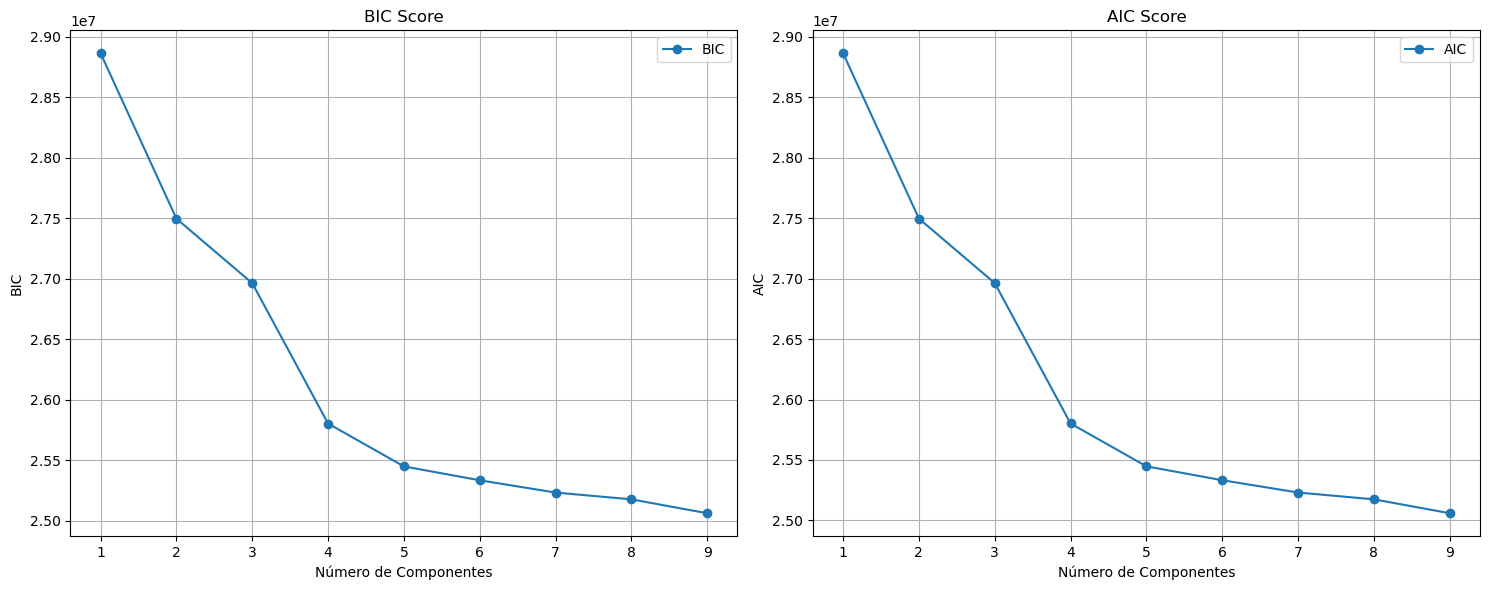

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Graficamos BIC y AIC
ax[0].plot(n_clusters, bic, marker='o', label='BIC')
ax[0].set_xlabel('Número de Componentes')
ax[0].set_ylabel('BIC')
ax[0].set_title('BIC Score')
ax[0].grid()
ax[0].legend()

ax[1].plot(n_clusters, aic, marker='o', label='AIC')
ax[1].set_xlabel('Número de Componentes')
ax[1].set_ylabel('AIC')
ax[1].set_title('AIC Score')
ax[1].grid()
ax[1].legend()

plt.tight_layout()
plt.show()

A continuación, se reconstruye la imagen utilizando los colores predominantes obtenidos por el modelo de 4 clusters.

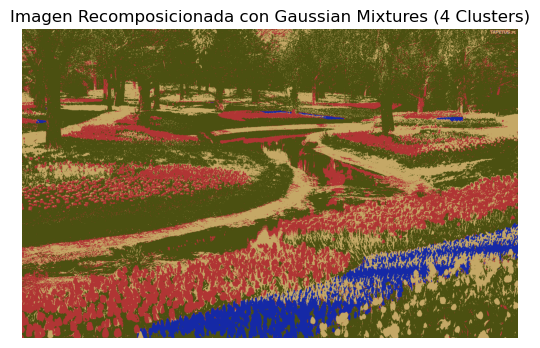

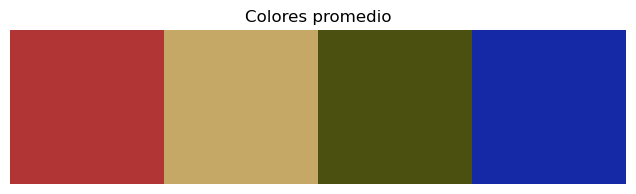


Paleta de colores usando Imagen Recomposicionada con Gaussian Mixtures (4 Clusters):
Color 1: [176  53  52 255]
Color 2: [197 168 102 255]
Color 3: [ 75  80  17 255]
Color 4: [ 21  41 166 255]


In [12]:
# Se aplica Gaussian Mixture Model (GMM) con 4 clusters
n_clusters = 4
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(pixels)

# Se obtienen los clusters y las probabilidades de pertenencia
labels = gmm.predict(pixels)
centroids = np.array(gmm.means_, dtype='uint8')  # Los centroides son las medias de las gaussianas

# Se recompone la imagen con los colores resultantes de las gaussianas y visualizamos los resultados
reconstructed_image_gmm = centroids[labels].reshape(image_np.shape)

plt.imshow(reconstructed_image_gmm)
plt.axis('off')
plt.title(f'Imagen Recomposicionada con Gaussian Mixtures ({n_clusters} Clusters)')
plt.show()
img_paleta(centroids)
print_paleta(centroids, f'Imagen Recomposicionada con Gaussian Mixtures ({n_clusters} Clusters)')


## III. Clusterización con Clustering Jerárquico: 

Finalmente, se aplica el algoritmo de Clustering Jerárquico. 

Dado que es un algoritmo con una alta exigencia de recursos computacionales, se tomó la decisión de reducir la cantidad de pixeles de la imagen para facilitar su procesamiento y disminución su tiempo de ejecución.
 
Para tomar la decisión de la cantidad de clusters a utilizar, se procede a generar un dendograma a partir de la matriz Z, la cual se obtiene a través del algoritmo de *linkage*. El dendograma nos permitirá visualizar la distancia entre los clusters y, por ende, determinar cuál es la distancia máxima a utilizar para generar los clusters principales.

En este caso, se seleccionó el uso del *Método de Ward* dado que, de manera similar a *KMeans*, busca reducir la varianza intra-cluster. Esto entrega como resultado una segmentación (paleta en este caso) más consistente al trabajar con colores. Bajo el mismo motivo, resulta más conveniente a la hora de comparar resultados con KMeans. 

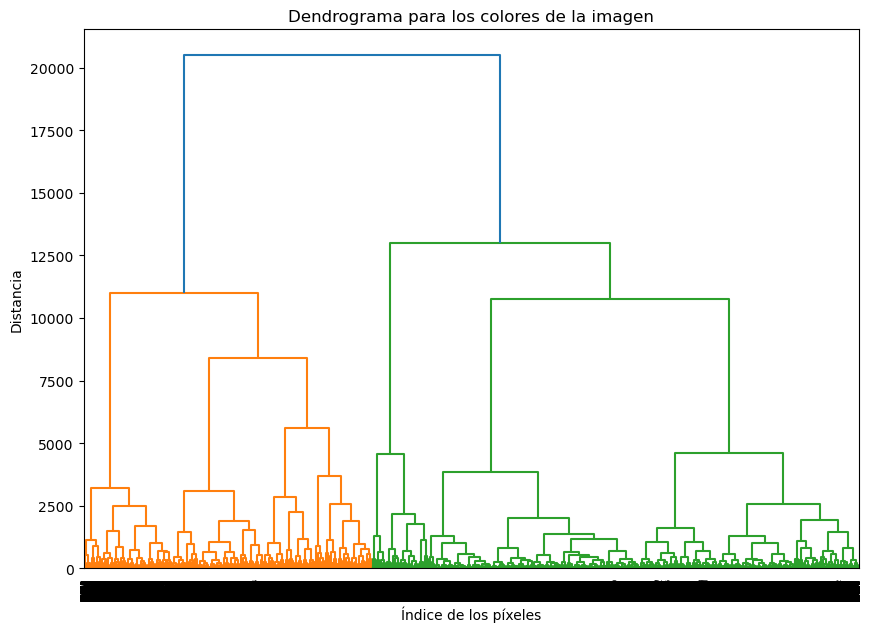

In [13]:
# Reducimos la cantidad de pixeles para facilitar el procesamiento
image = image.resize((296, 184))
pixels = np.array(image) 
pixels = pixels.reshape((-1, 4))

# Aplicamos clustering jerárquico
Z = linkage(pixels, method='ward')

# Graficamos el dendograma
plt.figure(figsize=(10, 7))
plt.title('Dendrograma para los colores de la imagen')
plt.xlabel('Índice de los píxeles')
plt.ylabel('Distancia')
dendro = dendrogram(Z)
plt.show()

A partir del dendograma, se observa que los grandes clusters se obtienen a una distancia aproximada de ~10.000. Por lo tanto, se utilizará esta distancia para determinar los clusters a utilizar, utilizando este valor para filtrar sólo los clusters que se encuentran a una distancia mayor a 10.000.

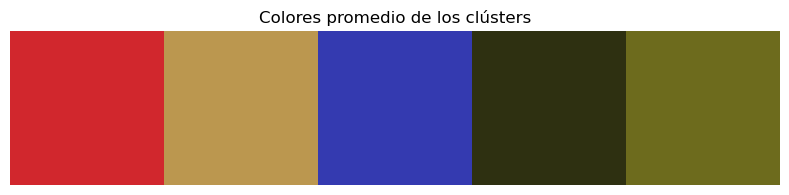


Paleta de colores usando :
Color 1: [209  39  45 255]
Color 2: [187 151  79 255]
Color 3: [ 52  58 176 255]
Color 4: [ 46  48  17 255]
Color 5: [109 107  29 255]


In [18]:
### Se corta el dendograma a una distancia mínima de 10.000
max_d = 10000
clusters = fcluster(Z, max_d, criterion='distance')

# Se obtiene la paleta de colores
clusters_unique = np.unique(clusters)
cluster_colors = []

for cluster in clusters_unique:
    cluster_pixels = pixels[clusters == cluster]
    cluster_mean = cluster_pixels.mean(axis=0)
    cluster_colors.append(cluster_mean)

cluster_colors = np.array(cluster_colors).astype(np.uint8)

plt.figure(figsize=(12, 2))
plt.title('Colores promedio de los clústers')
plt.imshow([cluster_colors]) 
plt.axis('off')
plt.show()

print_paleta(cluster_colors, '')

La cantidad de clusters obtenidos a partir de este filtro es de 5. A continuación, se procede a reconstruir la imagen utilizando los colores predominantes obtenidos por el modelo de 5 clusters.	

In [19]:
# Datos originales
data = np.array(image)
original_shape = data.shape

# Se aplica clustering jerárquico con 5 clusters
n_clusters = 5
clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering.fit_predict(pixels)

# Se obtiene los colores promedio
colors = np.array([pixels[labels == i].mean(axis=0) for i in range(n_clusters)])

# Se asignan los nuevos colores a los píxeles
new_image_pixels = colors[labels].reshape(original_shape).astype(np.uint8)

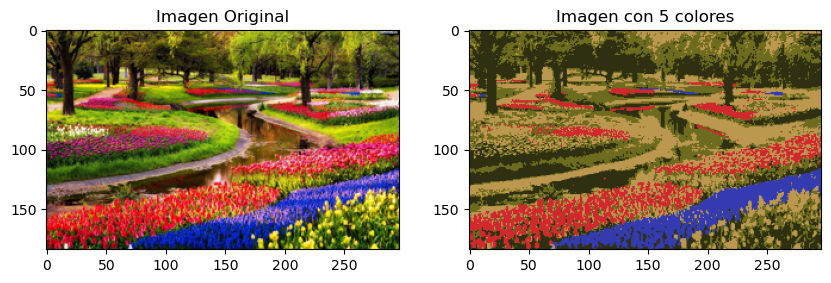

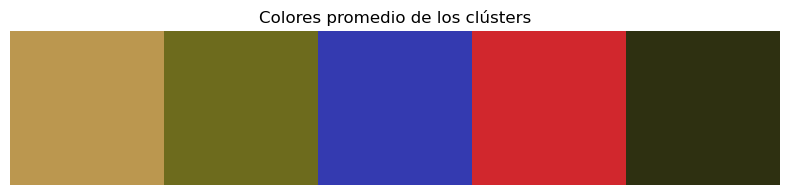


Paleta de colores usando Imagen con 5 colores:
Color 1: [187 151  79 255]
Color 2: [109 107  29 255]
Color 3: [ 52  58 176 255]
Color 4: [209  39  45 255]
Color 5: [ 46  48  17 255]


In [20]:
# Se muestra la comparación entre la imagen original contra la recompuesta
plt.figure(figsize=(10, 5))

# Imagen original
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(image)

# Imagen recompuesta
plt.subplot(1, 2, 2)
plt.title(f"Imagen con {n_clusters} colores")
plt.imshow(new_image_pixels)

plt.show()

plt.figure(figsize=(12, 2))
plt.title('Colores promedio de los clústers')
plt.imshow([(colors).astype(int)]) 
plt.axis('off')
plt.show()

print_paleta((colors).astype(int), f'Imagen con {n_clusters} colores')

# Conclusiones

Por un lado, se puede observar que las tres técnicas generaron una cantidad de colores similar, siendo 5 para *Kmeans* y *Clustering Jerárquico* y 4 para *GMM*.



Para el caso de las diferentes paletas, podemos observar que todas se componen por colores similares, existiendo predominancia por tonos verdes, azules, rojos y cafés. Por su lado, también cabe destacar que los colores son heterogéneos, lo que permite concluir que la clusterización fue exitosa en la identificación de los colores predominantes de la imagen y no se generaron clusters con colores similares.

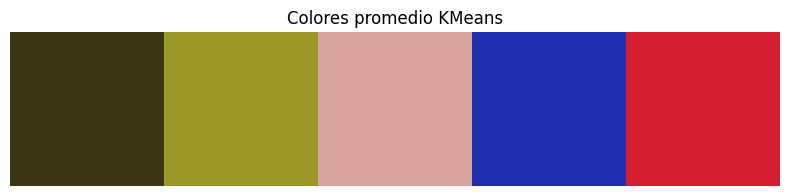

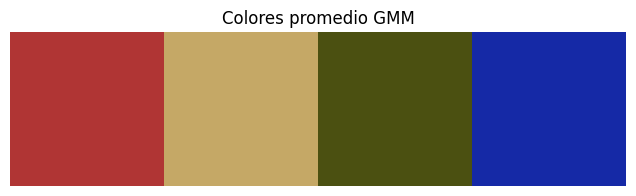

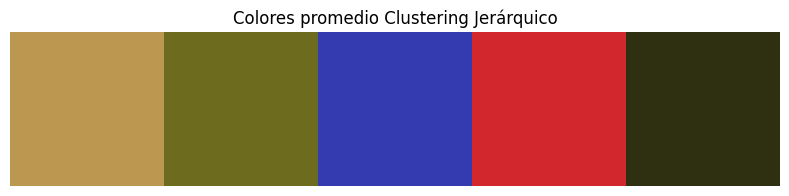

Por otro lado, las diferentes técnicas de clusterización generaron resultados visuales similares, aunque en con detalles en la intensidad de los colores. Por ejemplo, en el caso de *Kmeans* se observa una imagen más saturada y con colores más intensos, mientras que en *GMM* y *Clustering Jerárquico* se observan colores menos saturados y más opacos.

También se pueden observar diferencias en la clasificación de colores en el reflejo del agua entre *kmeans* y *Cluster Jerárquico* con respecto a *GMM*, donde los primeros clasifican el reflejo del agua como un color verde, mientras que *GMM* lo clasifica como un color rojo. Estas diferencias pueden deberse a la forma en que cada algoritmo clasifica los colores y a la forma en que se agrupan los datos, además de la diferencia en la cantidad de clusters utilizados (5 en *Kmeans* y *Cluster Jerárquico* y 4 en *GMM*).

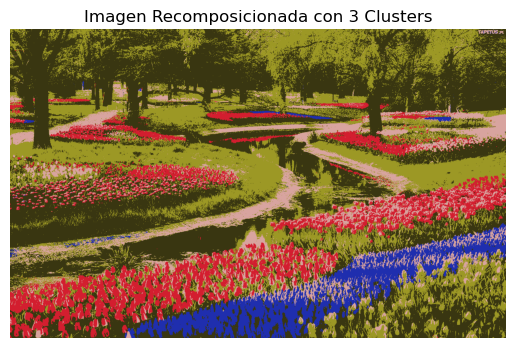

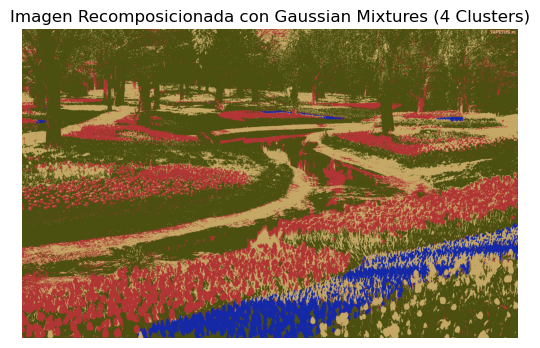

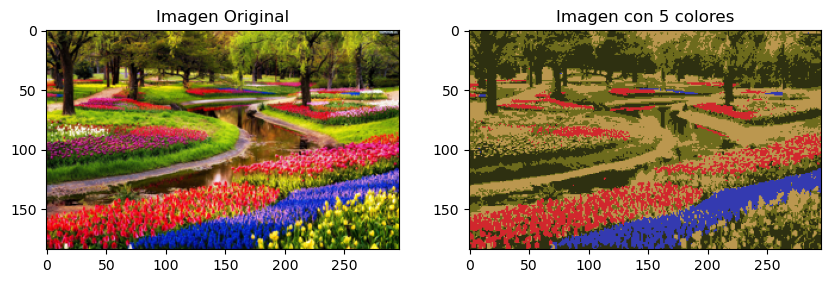

Por su parte, cabe discutir que la reducción de la calidad de la imagen para el caso de *Clustering Jerárquico* puede afectar la generación de los clusters y, por ende, la calidad de la imagen resultante. En este caso, se observa que la imagen resultante es más pixelada y menos definida que las generadas por *Kmeans* y *GMM*. Esto tiene directa relación con la reducción de la cantidad de pixeles de la imagen, lo que afecta la calidad de la segmentación y, por ende, la calidad de la imagen resultante.